In [4]:
import os
import random
#For dealing with tables
import pandas as pd
#For dealing with linear algebra
import numpy as np
#For mapping the relations
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# URL of the CSV file
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv"

# Read the CSV file into a Pandas DataFrame
_data = pd.read_csv(url)

# Display the DataFrame
_data.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [6]:
_data=_data.drop(columns='Unnamed: 0')

In [7]:
_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [8]:
##Converting 'MMM-YY' feature to datetime type
_data['MMM-YY'] = pd.to_datetime(_data['MMM-YY'])
##Converting 'Dateofjoining' feature to datetime type
_data['Dateofjoining'] = pd.to_datetime(_data['Dateofjoining'])
##Converting 'LastWorkingDate' feature to datetime type
_data['LastWorkingDate'] = pd.to_datetime(_data['LastWorkingDate'])

In [9]:
_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

**Step:Imputation of missing data**

In [10]:
_data.isnull().sum()/len(_data)*100

MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

In [11]:
_data['Gender'].value_counts()

0.0    11074
1.0     7978
Name: Gender, dtype: int64

In [12]:
_data['Education_Level'].value_counts()

1    6864
2    6327
0    5913
Name: Education_Level, dtype: int64

**KNN  Imputation**

In [13]:
_data_nums=_data.select_dtypes(np.number)
#keeping only the numerical columns

In [14]:
_data_nums

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,28.0,0.0,2,57387,1,1,2381060,2
1,1,28.0,0.0,2,57387,1,1,-665480,2
2,1,28.0,0.0,2,57387,1,1,0,2
3,2,31.0,0.0,2,67016,2,2,0,1
4,2,31.0,0.0,2,67016,2,2,0,1
...,...,...,...,...,...,...,...,...,...
19099,2788,30.0,0.0,2,70254,2,2,740280,3
19100,2788,30.0,0.0,2,70254,2,2,448370,3
19101,2788,30.0,0.0,2,70254,2,2,0,2
19102,2788,30.0,0.0,2,70254,2,2,200420,2


In [15]:
_data_nums.isnull().sum()

Driver_ID                0
Age                     61
Gender                  52
Education_Level          0
Income                   0
Joining Designation      0
Grade                    0
Total Business Value     0
Quarterly Rating         0
dtype: int64

In [16]:
_data_nums.drop(columns='Driver_ID',inplace=True)
columns=_data_nums.columns

In [17]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean',)
imputer.fit(_data_nums)
# transform the dataset
_data_new = imputer.transform(_data_nums)

In [18]:
_data_new=pd.DataFrame(_data_new)

In [19]:
_data_new

,0,1,2,3,4,5,6,7
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...
19099,30.0,0.0,2.0,70254.0,2.0,2.0,740280.0,3.0
19100,30.0,0.0,2.0,70254.0,2.0,2.0,448370.0,3.0
19101,30.0,0.0,2.0,70254.0,2.0,2.0,0.0,2.0
19102,30.0,0.0,2.0,70254.0,2.0,2.0,200420.0,2.0


In [20]:
_data_new.columns=columns

In [21]:
_data_new.isnull().sum()

Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
dtype: int64

**Getting the remaining columns back**

In [22]:
remaining_columns=list(set(_data.columns).difference(set(columns)))

In [23]:
data=pd.concat([_data_new, _data[remaining_columns]],axis=1)

In [24]:
data.head()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Dateofjoining,Driver_ID,MMM-YY,LastWorkingDate,City
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,2018-12-24,1,2019-01-01,NaT,C23
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,2018-12-24,1,2019-02-01,NaT,C23
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,2018-12-24,1,2019-03-01,2019-03-11,C23
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-11-06,2,2020-11-01,NaT,C7
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-11-06,2,2020-12-01,NaT,C7


**Checking if the concat is correct or not**

In [25]:
data[data['Driver_ID']==2788]

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Dateofjoining,Driver_ID,MMM-YY,LastWorkingDate,City
19097,29.0,0.0,2.0,70254.0,2.0,2.0,0.0,1.0,2020-06-08,2788,2020-06-01,NaT,C27
19098,30.0,0.0,2.0,70254.0,2.0,2.0,497690.0,3.0,2020-06-08,2788,2020-07-01,NaT,C27
19099,30.0,0.0,2.0,70254.0,2.0,2.0,740280.0,3.0,2020-06-08,2788,2020-08-01,NaT,C27
19100,30.0,0.0,2.0,70254.0,2.0,2.0,448370.0,3.0,2020-06-08,2788,2020-09-01,NaT,C27
19101,30.0,0.0,2.0,70254.0,2.0,2.0,0.0,2.0,2020-06-08,2788,2020-10-01,NaT,C27
19102,30.0,0.0,2.0,70254.0,2.0,2.0,200420.0,2.0,2020-06-08,2788,2020-11-01,NaT,C27
19103,30.0,0.0,2.0,70254.0,2.0,2.0,411480.0,2.0,2020-06-08,2788,2020-12-01,NaT,C27


In [26]:
function_dict = {'Age':'max', 'Gender':'first','City':'first',
 'Education_Level':'last', 'Income':'last',
 'Joining Designation':'last','Grade':'last',
 'Dateofjoining':'last','LastWorkingDate':'last',
 'Total Business Value':'sum','Quarterly Rating':'last'}
new_train=data.groupby(['Driver_ID','MMM-YY']).aggregate(function_dict)

In [27]:
new_train

Age  Gender City  Education_Level   Income  \
Driver_ID MMM-YY                                                    
1         2019-01-01  28.0     0.0  C23              2.0  57387.0   
          2019-02-01  28.0     0.0  C23              2.0  57387.0   
          2019-03-01  28.0     0.0  C23              2.0  57387.0   
2         2020-11-01  31.0     0.0   C7              2.0  67016.0   
          2020-12-01  31.0     0.0   C7              2.0  67016.0   
...                    ...     ...  ...              ...      ...   
2788      2020-08-01  30.0     0.0  C27              2.0  70254.0   
          2020-09-01  30.0     0.0  C27              2.0  70254.0   
          2020-10-01  30.0     0.0  C27              2.0  70254.0   
          2020-11-01  30.0     0.0  C27              2.0  70254.0   
          2020-12-01  30.0     0.0  C27              2.0  70254.0   

                      Joining Designation  Grade Dateofjoining  \
Driver_ID MMM-YY                                                 
1         2019-01-01                  1.0    1.0    2018-12-24   
          2019-02-01                  1.0    1.0    2018-12-24   
          2019-03-01                  1.0    1.0    2018-12-24   
2         2020-11-01                  2.0    2.0    2020-11-06   
          2020-12-01                  2.0    2.0    2020-11-06   
...                                   ...    ...           ...   
2788      2020-08-01                  2.0    2.0    2020-06-08   
          2020-09-01                  2.0    2.0    2020-06-08   
          2020-10-01                  2.0    2.0    2020-06-08   
          2020-11-01                  2.0    2.0    2020-06-08   
          2020-12-01                  2.0    2.0    2020-06-08   

                     LastWorkingDate  Total Business Value  Quarterly Rating  
Driver_ID MMM-YY                                                              
1         2019-01-01             NaT             2381060.0               2.0  
          2019-02-01             NaT             -665480.0               2.0  
          2019-03-01      2019-03-11                   0.0               2.0  
2         2020-11-01             NaT                   0.0               1.0  
          2020-12-01             NaT                   0.0               1.0  
...                              ...                   ...               ...  
2788      2020-08-01             NaT              740280.0               3.0  
          2020-09-01             NaT              448370.0               3.0  
          2020-10-01             NaT                   0.0               2.0  
          2020-11-01             NaT              200420.0               2.0  
          2020-12-01             NaT              411480.0               2.0  

[19104 rows x 11 columns]

In [28]:
#direct sorting can work but you have to use sort_values
df=new_train.sort_index( ascending=[True,True])

In [29]:
#you can skip the "group by" code if you do sort_values directly

In [30]:
df.head(10)

Age  Gender City  Education_Level   Income  \
Driver_ID MMM-YY                                                    
1         2019-01-01  28.0     0.0  C23              2.0  57387.0   
          2019-02-01  28.0     0.0  C23              2.0  57387.0   
          2019-03-01  28.0     0.0  C23              2.0  57387.0   
2         2020-11-01  31.0     0.0   C7              2.0  67016.0   
          2020-12-01  31.0     0.0   C7              2.0  67016.0   
4         2019-12-01  43.0     0.0  C13              2.0  65603.0   
          2020-01-01  43.0     0.0  C13              2.0  65603.0   
          2020-02-01  43.0     0.0  C13              2.0  65603.0   
          2020-03-01  43.0     0.0  C13              2.0  65603.0   
          2020-04-01  43.0     0.0  C13              2.0  65603.0   

                      Joining Designation  Grade Dateofjoining  \
Driver_ID MMM-YY                                                 
1         2019-01-01                  1.0    1.0    2018-12-24   
          2019-02-01                  1.0    1.0    2018-12-24   
          2019-03-01                  1.0    1.0    2018-12-24   
2         2020-11-01                  2.0    2.0    2020-11-06   
          2020-12-01                  2.0    2.0    2020-11-06   
4         2019-12-01                  2.0    2.0    2019-12-07   
          2020-01-01                  2.0    2.0    2019-12-07   
          2020-02-01                  2.0    2.0    2019-12-07   
          2020-03-01                  2.0    2.0    2019-12-07   
          2020-04-01                  2.0    2.0    2019-12-07   

                     LastWorkingDate  Total Business Value  Quarterly Rating  
Driver_ID MMM-YY                                                              
1         2019-01-01             NaT             2381060.0               2.0  
          2019-02-01             NaT             -665480.0               2.0  
          2019-03-01      2019-03-11                   0.0               2.0  
2         2020-11-01             NaT                   0.0               1.0  
          2020-12-01             NaT                   0.0               1.0  
4         2019-12-01             NaT                   0.0               1.0  
          2020-01-01             NaT                   0.0               1.0  
          2020-02-01             NaT                   0.0               1.0  
          2020-03-01             NaT              350000.0               1.0  
          2020-04-01      2020-04-27                   0.0               1.0

In [31]:
df1=pd.DataFrame()

In [32]:
df1['Driver_ID']=data['Driver_ID'].unique()

In [33]:
del _data

**Aggregation at Driver Level**

In [34]:
df1['Age'] = list(df.groupby('Driver_ID',axis=0).max('MMM-YY')['Age'])
df1['Gender'] = list(df.groupby('Driver_ID').agg({'Gender':'last'})['Gender'])
df1['City'] = list(df.groupby('Driver_ID').agg({'City':'last'})['City'])
df1['Education'] = list(df.groupby('Driver_ID').agg({'Education_Level':'last'})['Education_Level'])
df1['Income'] = list(df.groupby('Driver_ID').agg({'Income':'last'})['Income'])
df1['Joining_Designation'] = list(df.groupby('Driver_ID').agg({'Joining Designation':'last'})['Joining Designation'])
df1['Grade'] = list(df.groupby('Driver_ID').agg({'Grade':'last'})['Grade'])
df1['Total_Business_Value'] = list(df.groupby('Driver_ID',axis=0).sum('Total Business Value')['Total Business Value'])
df1['Last_Quarterly_Rating'] = list(df.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating'])

In [35]:
df1.head()

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0


**Creating a column which tells if the quarterly rating has increased for that**
**employee for those whose quarterly rating has increased we assign**
**the value 1**

In [36]:
#Quarterly rating at the beginning
qrf = df.groupby('Driver_ID').agg({'Quarterly Rating':'first'})
#Quarterly rating at the end
qrl = df.groupby('Driver_ID').agg({'Quarterly Rating':'last'})
#The dataset which has the employee ids and a bollean value which tells if the rating has increased or not
qr = (qrl['Quarterly Rating']>qrf['Quarterly Rating']).reset_index()
#the employee ids whose rating has increased
empid = qr[qr['Quarterly Rating']==True]['Driver_ID']
qri = []
for i in df1['Driver_ID']:
 if i in empid.values:
     qri.append(1)
 else:
     qri.append(0)
df1['Quarterly_Rating_Increased'] = qri

In [37]:
#alternative

In [38]:
df1

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0.0,82815.0,2.0,3.0,21748820.0,4.0,1
2377,2785,34.0,1.0,C9,0.0,12105.0,1.0,1.0,0.0,1.0,0
2378,2786,45.0,0.0,C19,0.0,35370.0,2.0,2.0,2815090.0,1.0,0
2379,2787,28.0,1.0,C20,2.0,69498.0,1.0,1.0,977830.0,1.0,0


**1. Creating a column called target which tells if the person has left the**
**company**

**2. Persons who have a last working date will have the value 1**'

**3. The dataset which has the employee ids and specifies if last working date** **is null and the employee ids who do**
**not have last working date are assigned 0.**


In [39]:
df.groupby('Driver_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate']

Driver_ID
1      2019-03-11
2             NaT
4      2020-04-27
5      2019-03-07
6             NaT
          ...    
2784          NaT
2785   2020-10-28
2786   2019-09-22
2787   2019-06-20
2788          NaT
Name: LastWorkingDate, Length: 2381, dtype: datetime64[ns]

In [40]:
lwr = (df.groupby('Driver_ID').agg({'LastWorkingDate': 'last'})['LastWorkingDate'].isna()).reset_index(name='MissingFlag')

# Get the list of 'Driver_ID' with missing 'LastWorkingDate'
empid = lwr[lwr['MissingFlag'] == True]['Driver_ID']

target = []
for i in df1['Driver_ID']:
 if i in empid.values:
    target.append(0)
 elif i not in empid.values:
    target.append(1)

df1['Target'] = target

In [41]:
#df4[['target']] = np.where(pd.notnull(df4[['LastWorkingDate']]), 1, 0)

In [42]:
#Driver_ID_df['LastWorkingDate'].apply(lambda x: 0 if x == None else 1)

In [43]:
df1

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Target
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,1
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0,0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0,1
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0,1
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0.0,82815.0,2.0,3.0,21748820.0,4.0,1,0
2377,2785,34.0,1.0,C9,0.0,12105.0,1.0,1.0,0.0,1.0,0,1
2378,2786,45.0,0.0,C19,0.0,35370.0,2.0,2.0,2815090.0,1.0,0,1
2379,2787,28.0,1.0,C20,2.0,69498.0,1.0,1.0,977830.0,1.0,0,1


**Creating a column which tells if the monthly income has increased for that employee**
**for those whose monthly income has increased we assign the value 1**

In [44]:

#Quarterly rating at the beginning
sf = df.groupby('Driver_ID').agg({'Income':'first'})
#Quarterly rating at the end
sl = df.groupby('Driver_ID').agg({'Income':'last'})
s = (sl['Income']>sf['Income']).reset_index()
#the employee ids whose monthly income has increased
empid = s[s['Income']==True]['Driver_ID']
si = []
for i in df1['Driver_ID']:
 if i in empid.values:
    si.append(1)
 else:
    si.append(0)
df1['Income_Increased'] = si


In [45]:
df1['Income_Increased'].value_counts()

0    2338
1      43
Name: Income_Increased, dtype: int64

In [46]:
df1.head()

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Target,Income_Increased
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,1,0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0,0,0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0,1,0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0,1,0
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,1,0,0


**Statistical Summary**

In [47]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2381.0,3.377018e+01,5.933265e+00,21.0,30.0,33.0,37.0,58.0
Gender,2381.0,4.105838e-01,4.914963e-01,0.0,0.0,0.0,1.0,1.0
Education,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Income,2381.0,5.933416e+04,2.838367e+04,10747.0,39104.0,55315.0,75986.0,188418.0
Joining_Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.0,2.0,3.0,5.0
Total_Business_Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Last_Quarterly_Rating,2381.0,1.427971e+00,8.098389e-01,1.0,1.0,1.0,2.0,4.0
Quarterly_Rating_Increased,2381.0,1.503570e-01,3.574961e-01,0.0,0.0,0.0,0.0,1.0


 **There are 2381 employees in the dataset. The minimum age of the employee in the data is 21 years and the
maximum age is 58 years. 75% of the employees have their monthly income less than or equal to 75,986 units.
50% of the mployees have acquired 8,17,680 as the their total business value.**


In [48]:
df1.describe(include=['O'])

,City
count,2381
unique,29
top,C20
freq,152


**Most of the drivers in the dataset were male, lived in C20 city and have completed their graduation in education.**

In [49]:
df1['Target'].value_counts()

1    1616
0     765
Name: Target, dtype: int64

**Out of 2381 drivers, 1616 drivers have left the organization.**

In [50]:
df1['Target'].value_counts(normalize=True)*100

1    67.870643
0    32.129357
Name: Target, dtype: float64

**Around 68% driver have left the organization.**

<Axes: >

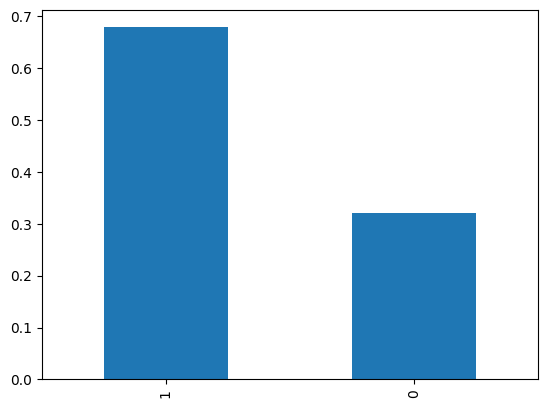

In [51]:
df1['Target'].value_counts(normalize=True).plot(kind='bar')

**Categorical Features: Gender, City, Education, Joining_Designation, Designation,
Last_Quarterly_Rating, Quarterly_Rating_Increased**



In [52]:
#Count of observations in each category
n = ['Gender','City','Education','Joining_Designation','Grade','Last_Quarterly_Rating','Quarterly_Rating_Increased']
for i in n:
 print(df1[i].value_counts())
 print("------------------------------------------------------------")

0.0    1400
1.0     975
0.6       3
0.2       2
0.4       1
Name: Gender, dtype: int64
------------------------------------------------------------
C20    152
C15    101
C29     96
C26     93
C8      89
C27     89
C10     86
C16     84
C22     82
C3      82
C28     82
C12     81
C5      80
C1      80
C21     79
C14     79
C6      78
C4      77
C7      76
C9      75
C25     74
C23     74
C24     73
C19     72
C2      72
C17     71
C13     71
C18     69
C11     64
Name: City, dtype: int64
------------------------------------------------------------
2.0    802
1.0    795
0.0    784
Name: Education, dtype: int64
------------------------------------------------------------
1.0    1026
2.0     815
3.0     493
4.0      36
5.0      11
Name: Joining_Designation, dtype: int64
------------------------------------------------------------
2.0    855
1.0    741
3.0    623
4.0    138
5.0     24
Name: Grade, dtype: int64
------------------------------------------------------------
1.0    1744
2.0     

**Around 59% employees are of the Male gender.**

**Around 6.4% employees are from city C20 and 4.2% from city C15.***

**The proportion of the employees who have completed their Graduate and 12th is approximately same.**

**Around 43% of the employees joined with the grade 1.**

**At the time of reporting, 34% of the employees had their grade as 2.**

**Around 73% of the employees had their last quarterly rating as 1.**

**The quarterly rating has not increased for around 87% employees.**

<ipython-input-53-b1d8df3cbfcc>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


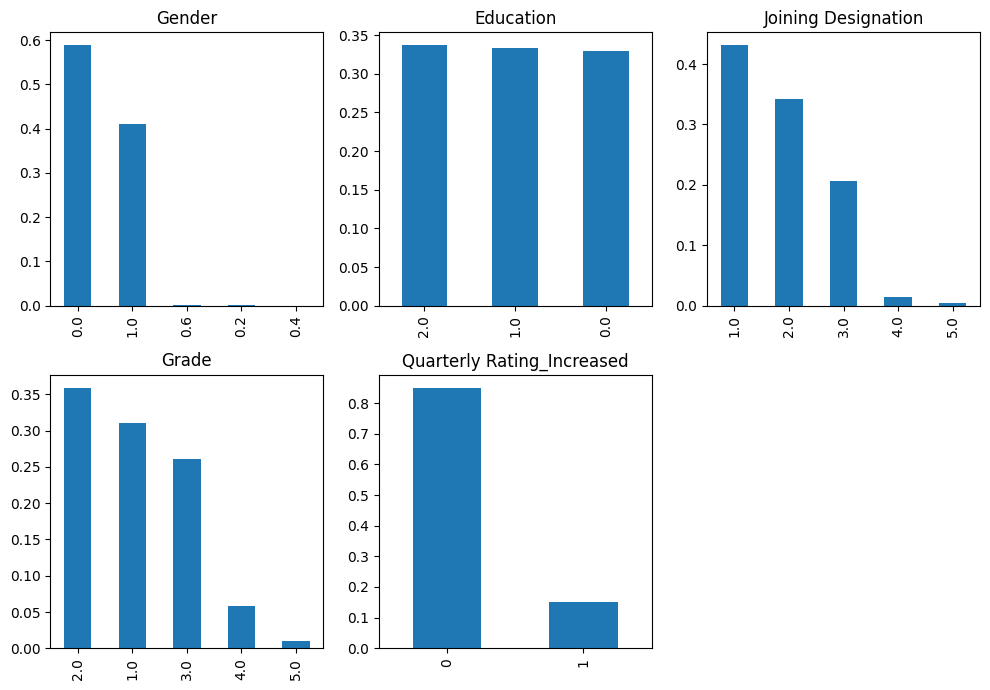

In [53]:
n = ['Gender','City','Joining_Designation','Grade','Last_Quarterly_Rating','Quarterly_Rating_Increased']
plt.subplots(figsize=(10,7))
plt.subplot(231)
df1['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.subplot(232)
df1['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(233)
df1['Joining_Designation'].value_counts(normalize=True).plot.bar(title='Joining Designation')
plt.subplot(234)
df1['Grade'].value_counts(normalize=True).plot.bar(title='Grade')
plt.subplot(235)
df1['Last_Quarterly_Rating'].value_counts(normalize=True).plot.bar(title='Last Quarterly Rating')
plt.subplot(235)
df1['Quarterly_Rating_Increased'].value_counts(normalize=True).plot.bar(title='Quarterly Rating_Increased')
plt.tight_layout()

<Axes: title={'center': 'City'}>

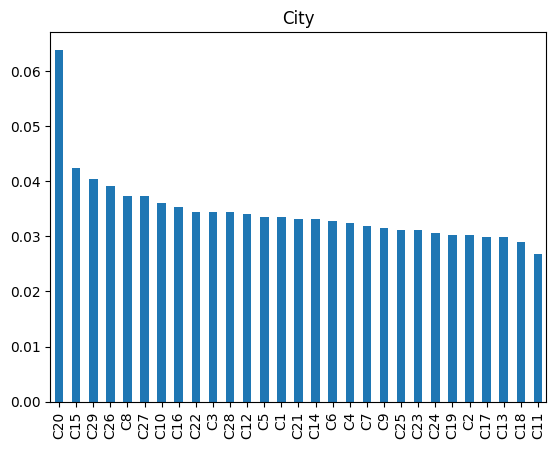

In [54]:
df1['City'].value_counts(normalize=True).plot.bar(title='City')

<ipython-input-55-376f5b7e7f3b>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)
<ipython-input-55-376f5b7e7f3b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Age'],color='black')


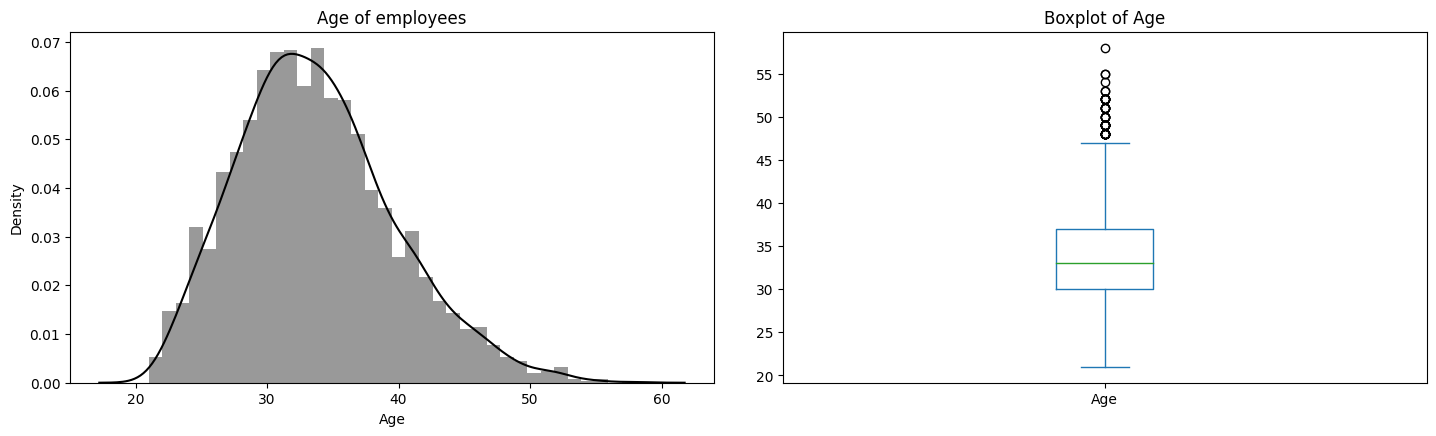

In [55]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.distplot(df1['Age'],color='black')
plt.title("Age of employees")
plt.subplot(122)
df1['Age'].plot.box(title='Boxplot of Age')
plt.tight_layout(pad=3)

**There are few outliers in the Age. The distribution is towards the right.**

<ipython-input-56-1a2f5bdc069d>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)
<ipython-input-56-1a2f5bdc069d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Income'],color='black')


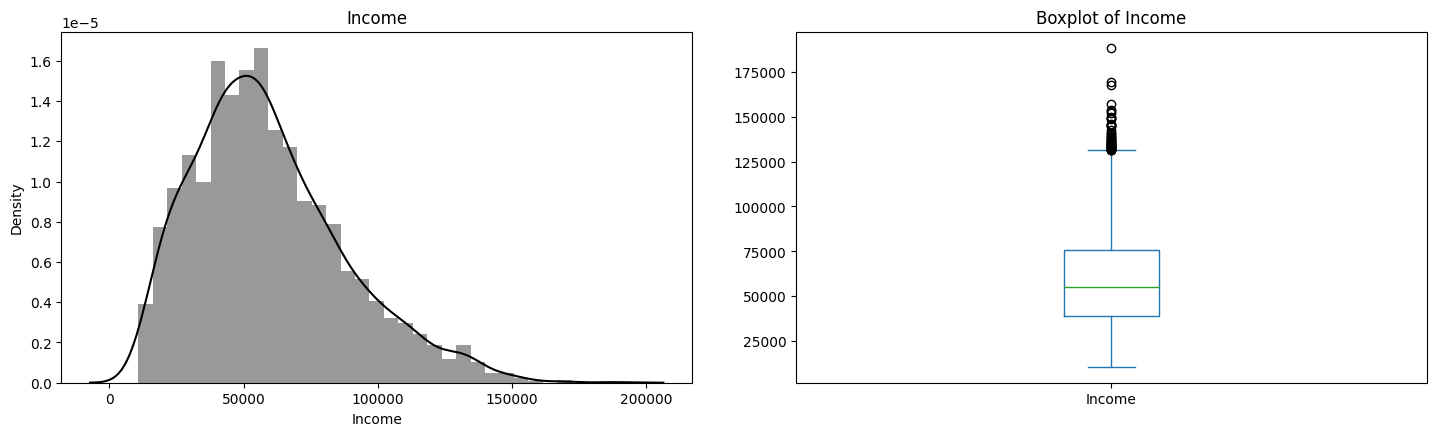

In [56]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.distplot(df1['Income'],color='black')
plt.title("Income")
plt.subplot(122)
df1['Income'].plot.box(title='Boxplot of Income')
plt.tight_layout(pad=3)

**The distribution of Salary is towards the right and there are outliers for this feature as well**

<ipython-input-57-c36e90af5843>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)
<ipython-input-57-c36e90af5843>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Total_Business_Value'],color='black')


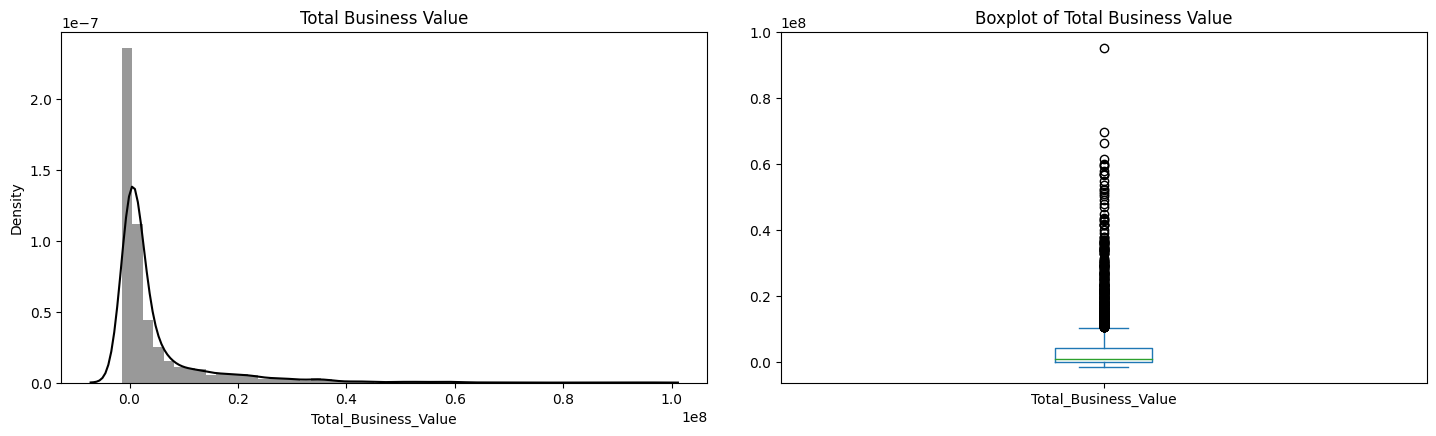

In [57]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.distplot(df1['Total_Business_Value'],color='black')
plt.title("Total Business Value")
plt.subplot(122)
df1['Total_Business_Value'].plot.box(title='Boxplot of Total Business Value')
plt.tight_layout(pad=3)

**The distribution of total business value is towards the right. There are a lot of outliers for the feature Total
Business Value.**

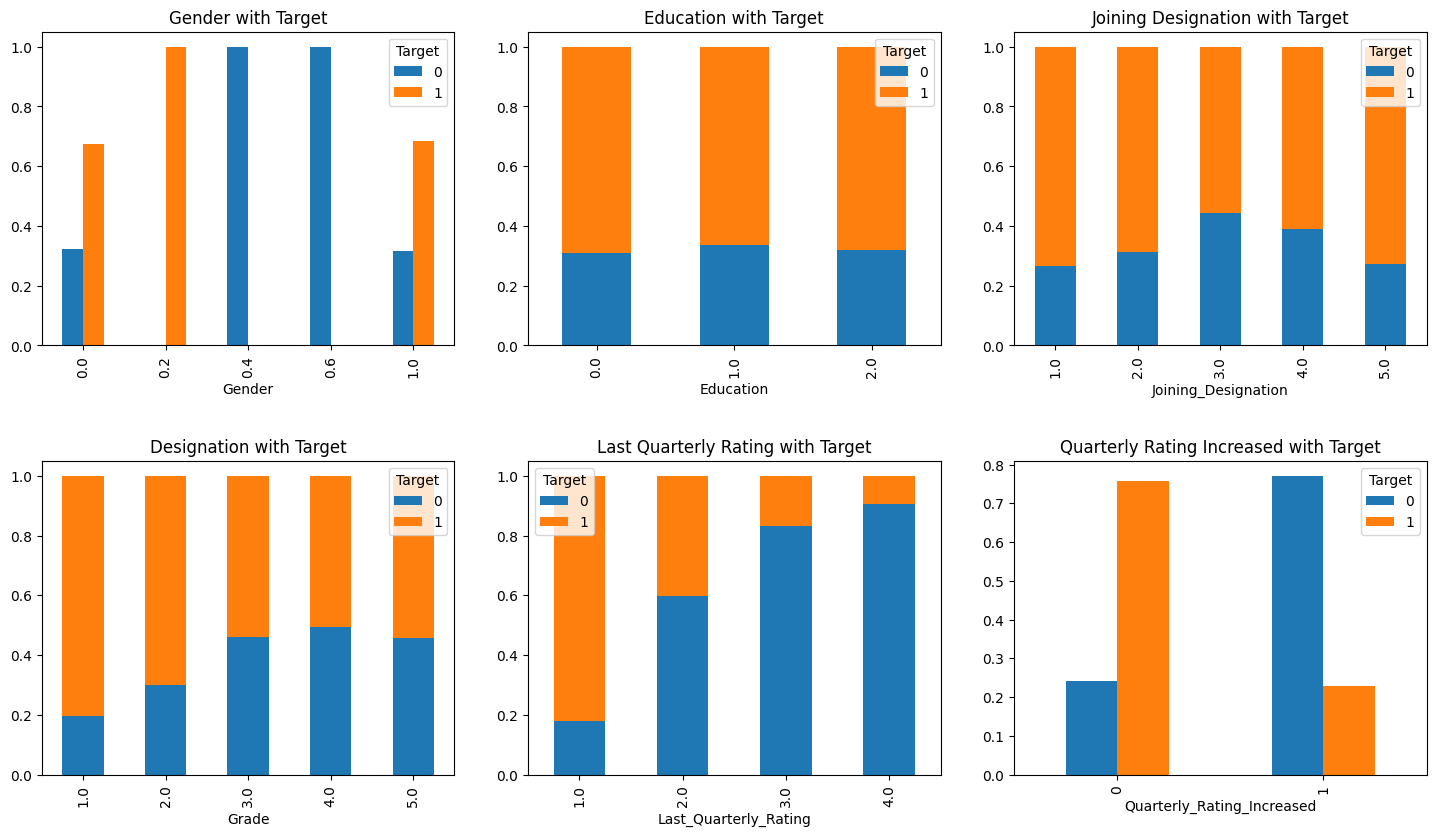

In [58]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots(2, 3, figsize=(15, 9))

# Gender feature with Target
gender = pd.crosstab(df1['Gender'], df1['Target'])
gender.div(gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, ax=axes[0, 0], title="Gender with Target")

# Education feature with Target
education = pd.crosstab(df1['Education'], df1['Target'])
education.div(education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axes[0, 1], title="Education with Target")

# Joining Designation feature with Target
jde = pd.crosstab(df1['Joining_Designation'], df1['Target'])
jde.div(jde.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axes[0, 2], title="Joining Designation with Target")

# Designation feature with Target
desig = pd.crosstab(df1['Grade'], df1['Target'])
desig.div(desig.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axes[1, 0], title="Designation with Target")

# Last Quarterly Rating feature with Target
lqrate = pd.crosstab(df1['Last_Quarterly_Rating'], df1['Target'])
lqrate.div(lqrate.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axes[1, 1], title="Last Quarterly Rating with Target")

# Quarterly Rating Increased feature with Target
qratei = pd.crosstab(df1['Quarterly_Rating_Increased'], df1['Target'])
qratei.div(qratei.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, ax=axes[1, 2], title="Quarterly Rating Increased with Target")

plt.tight_layout(pad=3)
plt.show()

**The proportion of gender and education is more or less the same for both the employees who left the organization and those who did not leave.**

**The employees who have their grade as 3 or 4 at the time of joining are less likely to leave the organization.**

**The employees who have their grade as 3 or 4 at the time of reporting are less likely to leave the organization.**

**The employees who have their last quarterly rating as 3 or 4 at the time of reporting are less likely to leave the organization.**

**The employees whose quarterly rating has increased are less likely to leave the organization.**


<Figure size 3000x700 with 0 Axes>

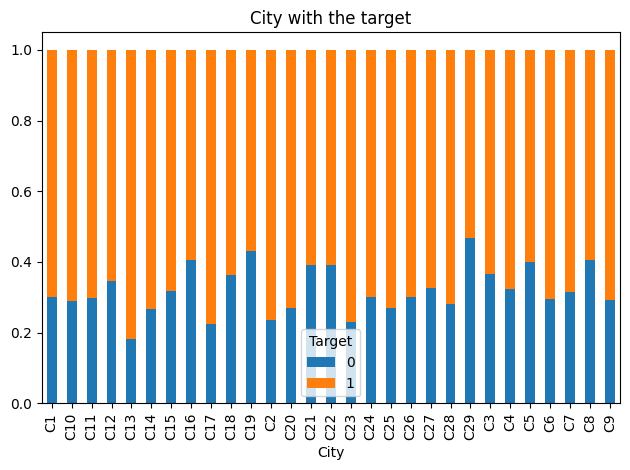

In [59]:
#City feature with the target
plt.figure(figsize=(30,7))
city = pd.crosstab(df1['City'],df1['Target'])
city.div(city.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,title="City with the target")
plt.tight_layout()


<Axes: title={'center': 'Age with the target'}, xlabel='Age_Bin'>

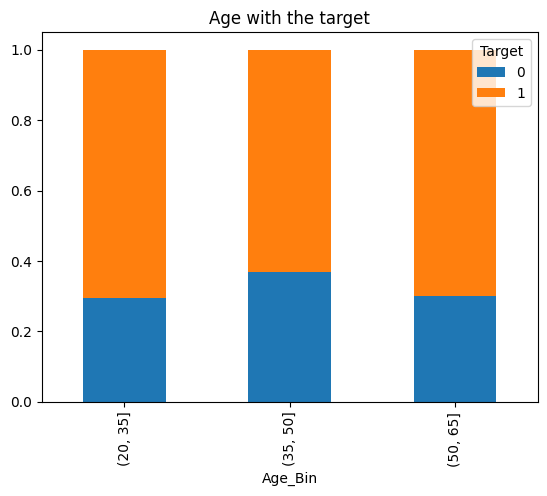

In [60]:
#Binning the Age into categories
df1['Age_Bin'] = pd.cut(df1['Age'],bins=[20,35,50,65])
#Age feature with Target
agebin = pd.crosstab(df1['Age_Bin'],df1['Target'])
agebin.div(agebin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,title="Age with the target")

**The employees whose age is in the 20-35 or 50-65 groups are less likely to leave the organization.**

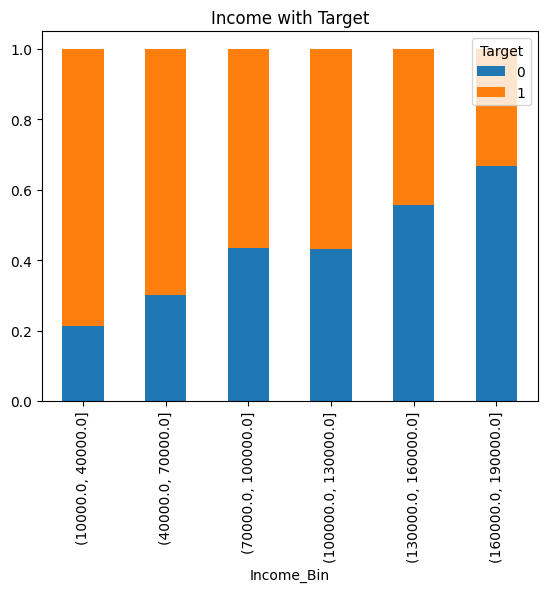

In [61]:
# Binning the 'Income' column
df1['Income_Bin'] = pd.cut(df1['Income'], bins=[10000, 40000, 70000, 100000, 130000, 160000, 190000, float('inf')])

# Visualizing the 'Income_Bin' feature with Target
income = pd.crosstab(df1['Income_Bin'], df1['Target'])
income.div(income.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, title="Income with Target")

plt.show()

**The employees whose monthly income is in 1,60,000-1,90,000 or 1,30,000-1,60,000 are less likely to leave the
organization.**

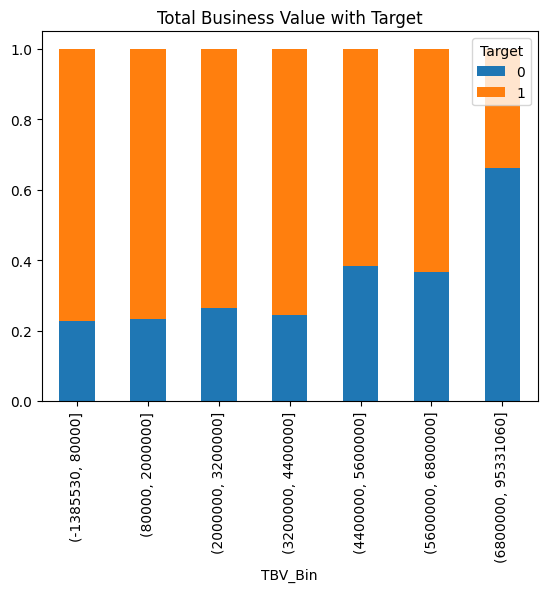

In [62]:
# Defining the bins and groups
m1 = round(df1['Total_Business_Value'].min())
m2 = round(df1['Total_Business_Value'].max())
bins = [m1, 80000, 2000000, 3200000, 4400000, 5600000, 6800000, m2]

# Binning the 'Total_Business_Value' column
df1['TBV_Bin'] = pd.cut(df1['Total_Business_Value'], bins)

# Visualizing the 'Total_Business_Value' feature with Target
tbvbin = pd.crosstab(df1['TBV_Bin'], df1['Target'])
tbvbin.div(tbvbin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, title="Total Business Value with Target")

plt.show()

**The employees who have acquired total business value greater than 68,00,000 are less likely to leave the
organiztion.**

In [63]:
#Dropping the bins columns
df1.drop(['Age_Bin','Income_Bin','TBV_Bin'],axis=1,inplace=True)

**Step:One Hot Encoding**

Converting categorical variables to numeric values so that Machine Learning models can be applied.

Alternatively, we can do "Target" Imputation.

In [64]:
df1 = pd.concat([df1,pd.get_dummies(df1['City'],prefix='City')],axis=1)

**Step-5:Scaling the data** (Only done on training set)

Normalising the Dataset. The goal of normalization is to change the values of numeric columns in the dataset to a
common scale, without distorting differences in the ranges of values.

**Dropping the encoded and scaled columns**


In [65]:
df1

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,...,0,0,0,0,0,0,0,0,0,1
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0.0,82815.0,2.0,3.0,21748820.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2377,2785,34.0,1.0,C9,0.0,12105.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
2378,2786,45.0,0.0,C19,0.0,35370.0,2.0,2.0,2815090.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2379,2787,28.0,1.0,C20,2.0,69498.0,1.0,1.0,977830.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
from sklearn.preprocessing import MinMaxScaler

# Feature Variables
X = df1.drop(['Driver_ID', 'Target', 'City'], axis=1)
X_cols = X.columns

# MinMaxScaler
scaler = MinMaxScaler()

# Mathematically learning the distribution
X_scaled = scaler.fit_transform(X)

In [67]:
X=pd.DataFrame(X)

In [68]:
X.columns=X_cols

In [69]:
X

,Age,Gender,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Income_Increased,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,28.0,0.0,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,43.0,0.0,2.0,65603.0,2.0,2.0,350000.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29.0,0.0,0.0,46368.0,1.0,1.0,120360.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,31.0,1.0,1.0,78728.0,3.0,3.0,1265000.0,2.0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,34.0,0.0,0.0,82815.0,2.0,3.0,21748820.0,4.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2377,34.0,1.0,0.0,12105.0,1.0,1.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2378,45.0,0.0,0.0,35370.0,2.0,2.0,2815090.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2379,28.0,1.0,2.0,69498.0,1.0,1.0,977830.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
from sklearn.model_selection import train_test_split

# Target Variable
y = df1['Target']

# Split into 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=7)

In [71]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1904, 39), (477, 39), (1904,), (477,))

**Random Forest with class weights**

In [72]:
from sklearn.utils import class_weight

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid
param = {'max_depth': [2, 3, 4], 'n_estimators': [50, 100, 150, 200]}

# Create a RandomForestClassifier with balanced class weights
random_forest = RandomForestClassifier(class_weight='balanced_subsample')

# Perform grid search with cross-validation
grid_search = GridSearchCV(random_forest, param, cv=3, scoring='f1')
grid_search.fit(X_train, y_train)

# Display the best parameters and score
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print(f'The score is: {results.best_score_}')

display(grid_search)

# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Best parameters are: {'max_depth': 4, 'n_estimators': 100}
The score is: 0.8571204122992095
              precision    recall  f1-score   support

           0       0.69      0.58      0.63       148
           1       0.82      0.88      0.85       329

    accuracy                           0.79       477
   macro avg       0.76      0.73      0.74       477
weighted avg       0.78      0.79      0.78       477

[[ 86  62]
 [ 38 291]]


**The Random Forest With Class Weighting method out of all predicted 0 the measure of correctly predicted is 71% and for 1 it is 82%(Precision).**

**The Random Forest With Class Weighting method out of all actual 0 the measure of correctly predicted is 57% and for 1 it is 90%(Recall).**

In [74]:
param = {'max_depth':[2,3,4], 'n_estimators':[50,100,150,200]}
random_forest = RandomForestClassifier(class_weight ='balanced')
c = GridSearchCV(random_forest,param,cv=3,scoring='f1')
c.fit(X_train,y_train)
def display(results):
 print(f'Best parameters are : {results.best_params_}')
 print(f'The score is : {results.best_score_}')
display(c)
y_pred = c.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Best parameters are : {'max_depth': 4, 'n_estimators': 50}
The score is : 0.8574525563374547
              precision    recall  f1-score   support

           0       0.72      0.57      0.64       148
           1       0.82      0.90      0.86       329

    accuracy                           0.80       477
   macro avg       0.77      0.74      0.75       477
weighted avg       0.79      0.80      0.79       477

[[ 85  63]
 [ 33 296]]


**The Random Forest With Bootstrap Class Weighting method out of all predicted 0 the measure of correctly predicted is 71%, and for 1 it is 82%(Precision).**

**The Random Forest With Bootstrap Class Weighting method out of all actual 0 the measure of correctly predicted is 57% and for 1 it is 90%(Recall).**

No Need for now ## Step-6:Balancing the dataset using SMOTE
Since the Dataset is imbalance and is biased towards target=1, so we will use SMOTE to balance the dataset

In [75]:
#print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
#print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state = 7)
#X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

#print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
#print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

#print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
#print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

**Random Forest Classifier**

In [76]:
param = {'max_depth':[2,3,4], 'n_estimators':[50,100,150,200]}
random_forest = RandomForestClassifier(class_weight ='balanced')
c = GridSearchCV(random_forest,param,cv=3,scoring='f1')
c.fit(X_train,y_train)
def display(results):
 print(f'Best parameters are : {results.best_params_}')
 print(f'The score is : {results.best_score_}')
display(c)

Best parameters are : {'max_depth': 4, 'n_estimators': 150}
The score is : 0.8580857129892184


In [77]:
pred = c.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.70      0.57      0.63       148
           1       0.82      0.89      0.86       329

    accuracy                           0.79       477
   macro avg       0.76      0.73      0.74       477
weighted avg       0.79      0.79      0.79       477

[[ 85  63]
 [ 36 293]]


**The Random Forest  Class Weighting method out of all predicted 0 the measure of correctly predicted is 70%, and for 1 it is 82%(Precision).**

**The Random Forest  Class Weighting method out of all actual 0 the measure of correctly predicted is 57% and for 1 it is 89%(Recall).**

**XGBoost Classifier**

In [78]:
import xgboost as xgb
my_model = xgb.XGBClassifier(class_weight ='balanced')
#
my_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = my_model.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.64      0.57      0.60       148
           1       0.82      0.86      0.84       329

    accuracy                           0.77       477
   macro avg       0.73      0.71      0.72       477
weighted avg       0.76      0.77      0.76       477

[[ 84  64]
 [ 47 282]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:23:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


**The XGBoost Method Class Weighting method out of all predicted 0 the measure of correctly predicted is 64%, and for 1 it is 82%(Precision).**

**The XGBoost Method Class Weighting method out of all actual 0 the measure of correctly predicted is 57% and for 1 it is 86%(Recall).**

**Decision Tree Classifier**

              precision    recall  f1-score   support

           0       0.54      0.53      0.54       148
           1       0.79      0.79      0.79       329

    accuracy                           0.71       477
   macro avg       0.66      0.66      0.66       477
weighted avg       0.71      0.71      0.71       477

[[ 79  69]
 [ 68 261]]


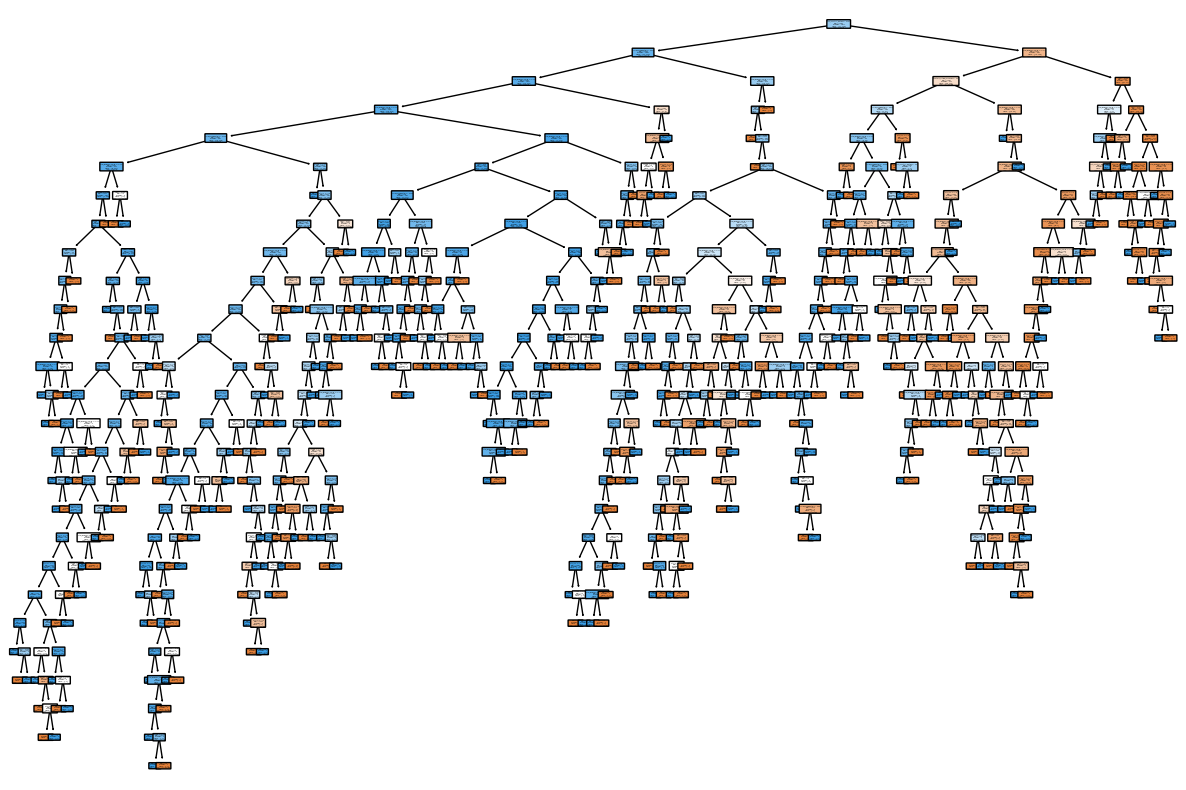

In [79]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X_cols, class_names=['Not Leaving', 'Leaving'], filled=True, rounded=True)
plt.show()

**The Decision Tree method out of all predicted 0 the measure of correctly predicted is 54%, and for 1 it is 80%
(Precision).**

**The Decision Tree method out of all actual 0 the measure of correctly predicted is 56%, and for 1 it is 79%(Recall)**

**Step-8:Result Analysis**

We observe that we are not getting very high recall on target 0 which may be due to small unbalanced dataset.
Higher precision means that an algorithm returns more relevant results than irrelevant ones, and high recall means
that an algorithm returns most of the relevant results (whether or not irrelevant ones are also returned).

**Feature Importance for the best model so far in Random Forest
Model**


In [80]:
param = {'max_depth':[2,3,4], 'n_estimators':[50,100,150,200]}
random_forest = RandomForestClassifier(class_weight ='balanced')
random_forest.fit(X_train,y_train)
def display(results):
 print(f'Best parameters are : {results.best_params_}')
 print(f'The score is : {results.best_score_}')
display(c)

Best parameters are : {'max_depth': 4, 'n_estimators': 150}
The score is : 0.8580857129892184


In [81]:
import time
import numpy as np
start_time = time.time()
importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.013 seconds


In [83]:
pd.DataFrame(zip(X.columns,std)).sort_values(by=[1], ascending=False)

,0,1
7,Last_Quarterly_Rating,0.080850
6,Total_Business_Value,0.059162
8,Quarterly_Rating_Increased,0.052186
3,Income,0.024180
5,Grade,0.018178
0,Age,0.016044
4,Joining_Designation,0.014602
1,Gender,0.008159
2,Education,0.007901
9,Income_Increased,0.007348


In [84]:
pd.DataFrame(zip(X.columns,importances)).sort_values(by=[1], ascending=False)

,0,1
6,Total_Business_Value,0.181238
3,Income,0.146799
7,Last_Quarterly_Rating,0.140978
0,Age,0.106932
8,Quarterly_Rating_Increased,0.061647
4,Joining_Designation,0.040826
2,Education,0.039480
5,Grade,0.038372
1,Gender,0.024753
17,City_C16,0.010679


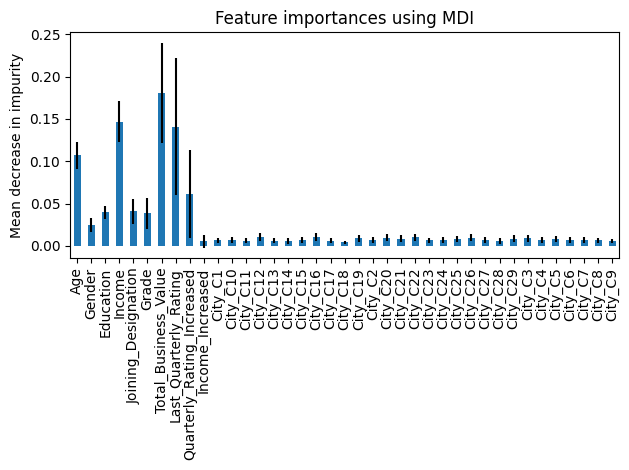

In [85]:
forest_importances = pd.Series(importances, index=X.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#limitations of impurity-based feature importances: Fix it
https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html